In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
%matplotlib inline

In [58]:
df = pd.read_csv("twitchdata-update.csv")

df

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


In [59]:
# # of unique languages in top 200 streamers
top200 = df.head(200)
top200['Language'].nunique()

14

C:\Users\isaia\AppData\Local\Temp\ipykernel_23812\3099010887.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis')


<module 'matplotlib.pyplot' from 'C:\\Users\\isaia\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

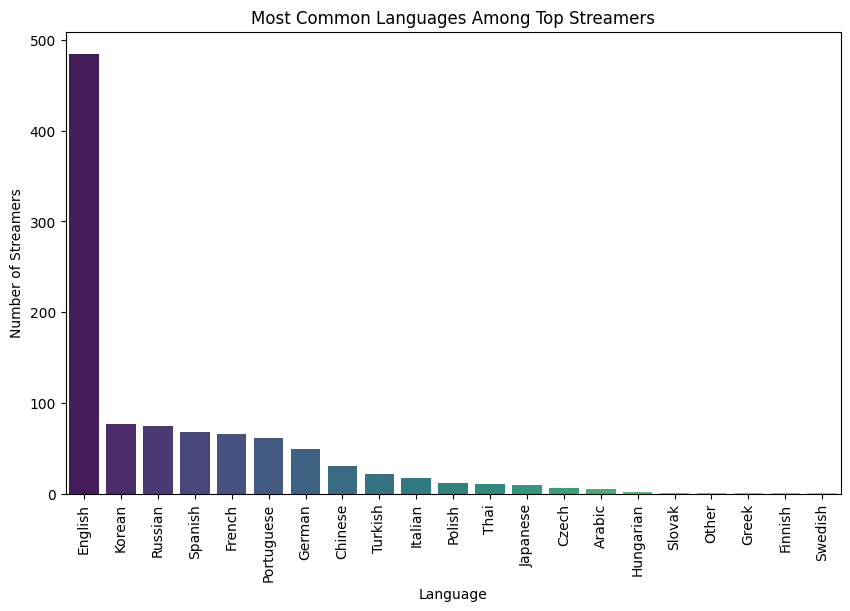

In [60]:
# most common languages

language_counts = df['Language'].value_counts()

language_counts

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis')
plt.title('Most Common Languages Among Top Streamers')
plt.xlabel('Language')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90)
plt

In [61]:
# Group by language and calculate mean watch time and followers
language_stats = df.groupby('Language').agg({
    'Watch time(Minutes)': 'mean',
    'Followers': 'mean'
}).sort_values(by='Watch time(Minutes)', ascending=False)

# Display the stats
language_stats

,Watch time(Minutes),Followers
Language,,
English,4.719196e+08,705685.645361
Portuguese,4.524883e+08,555868.262295
Japanese,4.186577e+08,160145.800000
German,3.939610e+08,479367.571429
French,3.780744e+08,439734.560606
Russian,3.762245e+08,339730.486486
Spanish,3.761948e+08,779686.117647
Korean,3.609664e+08,262173.870130
Polish,3.584857e+08,397090.583333


C:\Users\isaia\AppData\Local\Temp\ipykernel_23812\2819978350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_stats.index, y=language_stats['Watch time(Minutes)'], palette='coolwarm')


<module 'matplotlib.pyplot' from 'C:\\Users\\isaia\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

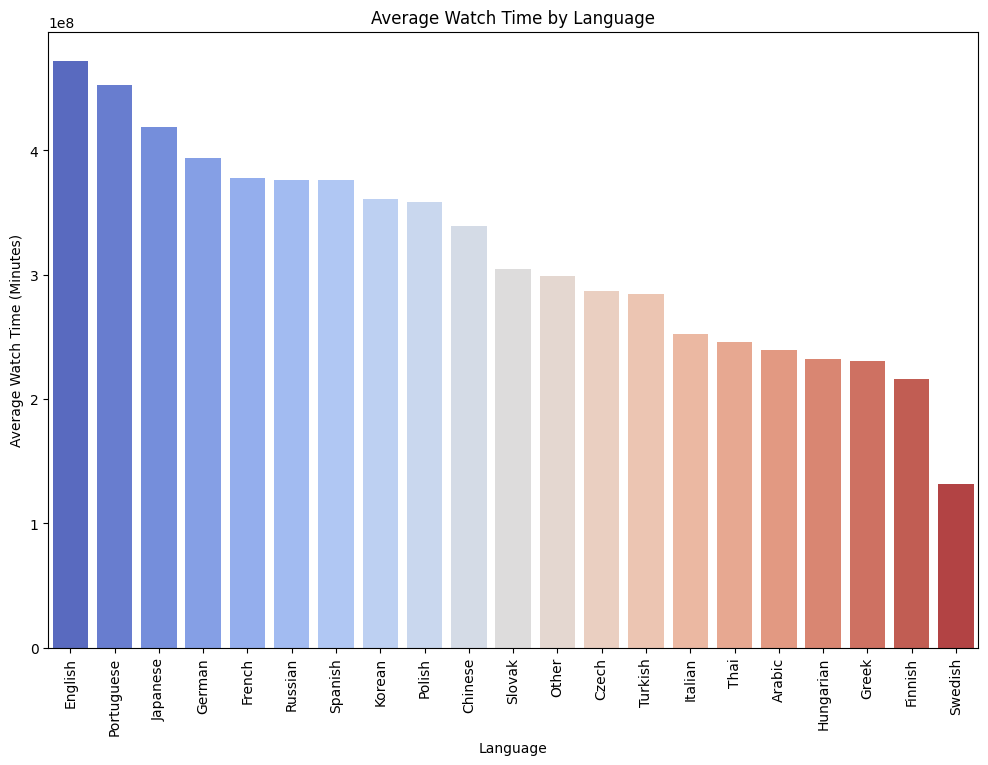

In [62]:
plt.figure(figsize=(12, 8))
sns.barplot(x=language_stats.index, y=language_stats['Watch time(Minutes)'], palette='coolwarm')
plt.title('Average Watch Time by Language')
plt.xlabel('Language')
plt.ylabel('Average Watch Time (Minutes)')
plt.xticks(rotation=90)
plt

C:\Users\isaia\AppData\Local\Temp\ipykernel_23812\4019239483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_stats.index, y=language_stats['Followers'], palette='coolwarm')


<module 'matplotlib.pyplot' from 'C:\\Users\\isaia\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

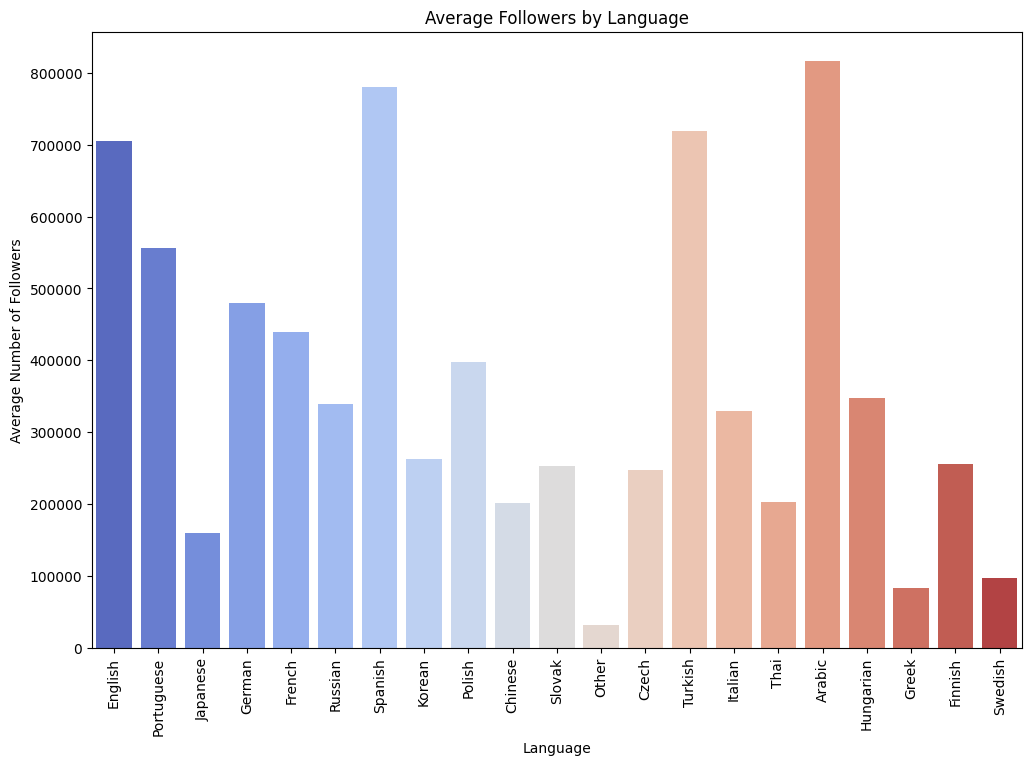

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(x=language_stats.index, y=language_stats['Followers'], palette='coolwarm')
plt.title('Average Followers by Language')
plt.xlabel('Language')
plt.ylabel('Average Number of Followers')
plt.xticks(rotation=90)
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\isaia\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

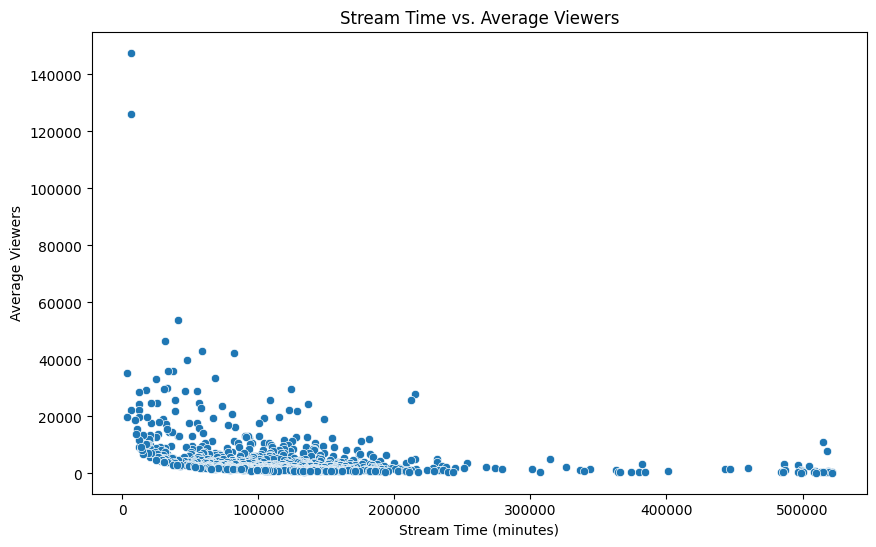

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stream time(minutes)', y='Average viewers', data=df)
plt.title('Stream Time vs. Average Viewers')
plt.xlabel('Stream Time (minutes)')
plt.ylabel('Average Viewers')
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\isaia\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

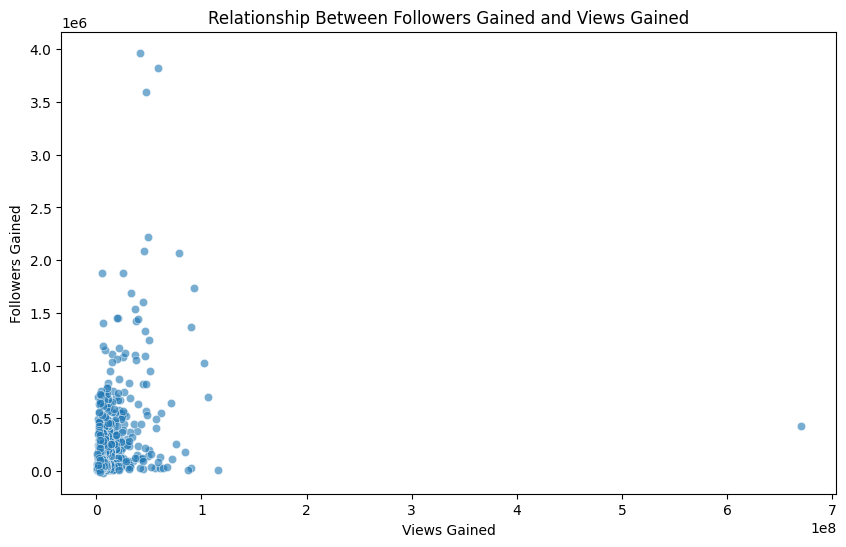

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Views gained', y='Followers gained', data=df, alpha=0.6)
plt.title('Relationship Between Followers Gained and Views Gained')
plt.xlabel('Views Gained')
plt.ylabel('Followers Gained')
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\isaia\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

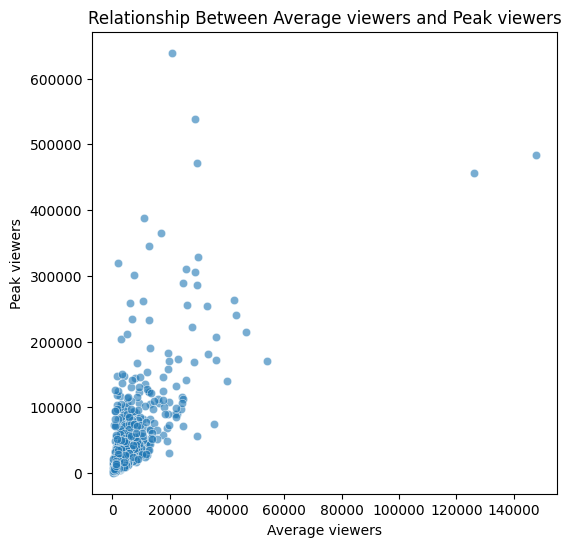

In [74]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Average viewers', y='Peak viewers', data=df, alpha=0.6)
plt.title('Relationship Between Average viewers and Peak viewers')
plt.xlabel('Average viewers')
plt.ylabel('Peak viewers')
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\isaia\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

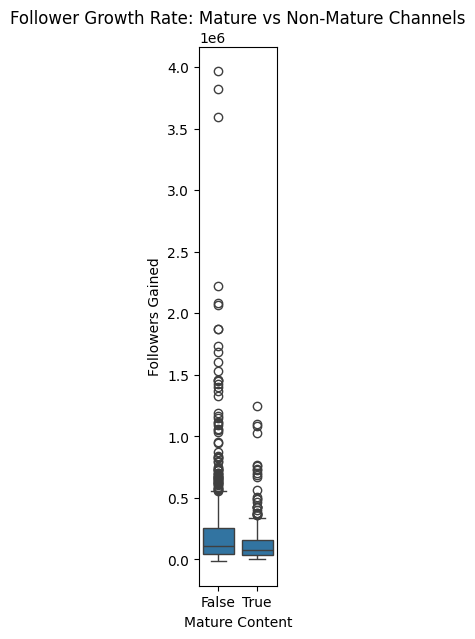

In [85]:
mature_followers_gained = df[df['Mature'] == True]['Followers gained']
non_mature_followers_gained = df[df['Mature'] == False]['Followers gained']

plt.figure(figsize=(1, 7))
sns.boxplot(x='Mature', y='Followers gained', data=df)
plt.title('Follower Growth Rate: Mature vs Non-Mature Channels')
plt.xlabel('Mature Content')
plt.ylabel('Followers Gained')
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\isaia\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

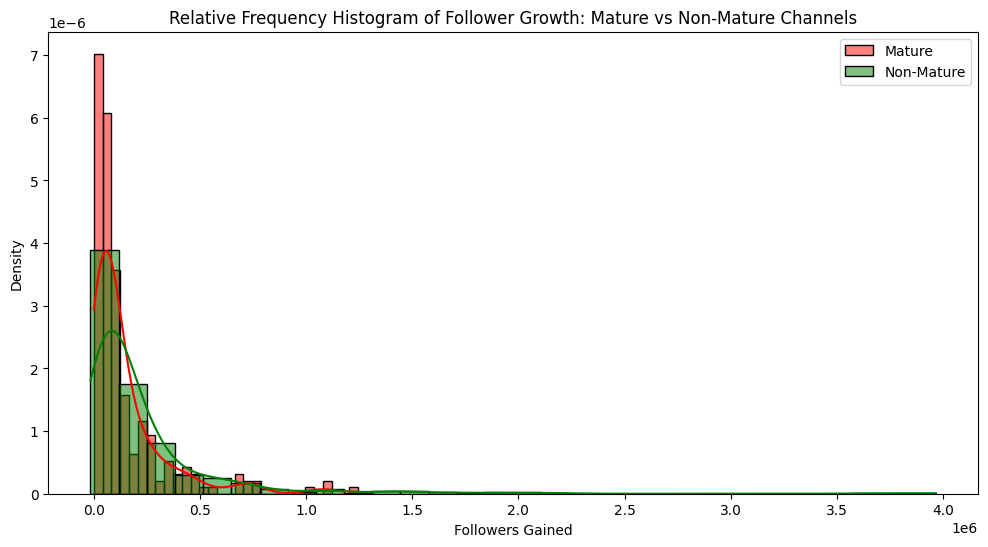

In [87]:
plt.figure(figsize=(12, 6))

# Histogram for mature channels with relative frequencies
sns.histplot(mature_followers_gained, kde=True, color='red', label='Mature', bins=30, stat='density')

# Histogram for non-mature channels with relative frequencies
sns.histplot(non_mature_followers_gained, kde=True, color='green', label='Non-Mature', bins=30, stat='density')

plt.title('Relative Frequency Histogram of Follower Growth: Mature vs Non-Mature Channels')
plt.xlabel('Followers Gained')
plt.ylabel('Density')
plt.legend()
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\isaia\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

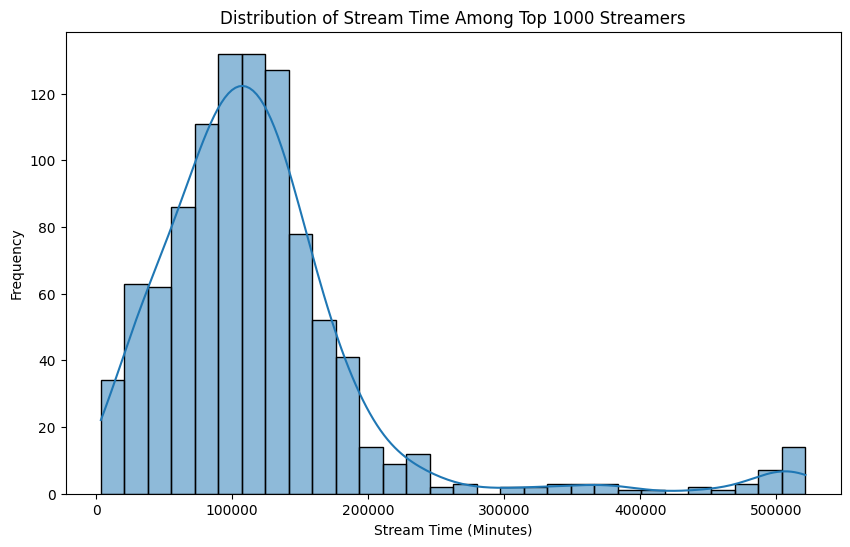

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Stream time(minutes)'], kde=True, bins=30)
plt.title('Distribution of Stream Time Among Top 1000 Streamers')
plt.xlabel('Stream Time (Minutes)')
plt.ylabel('Frequency')
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\isaia\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

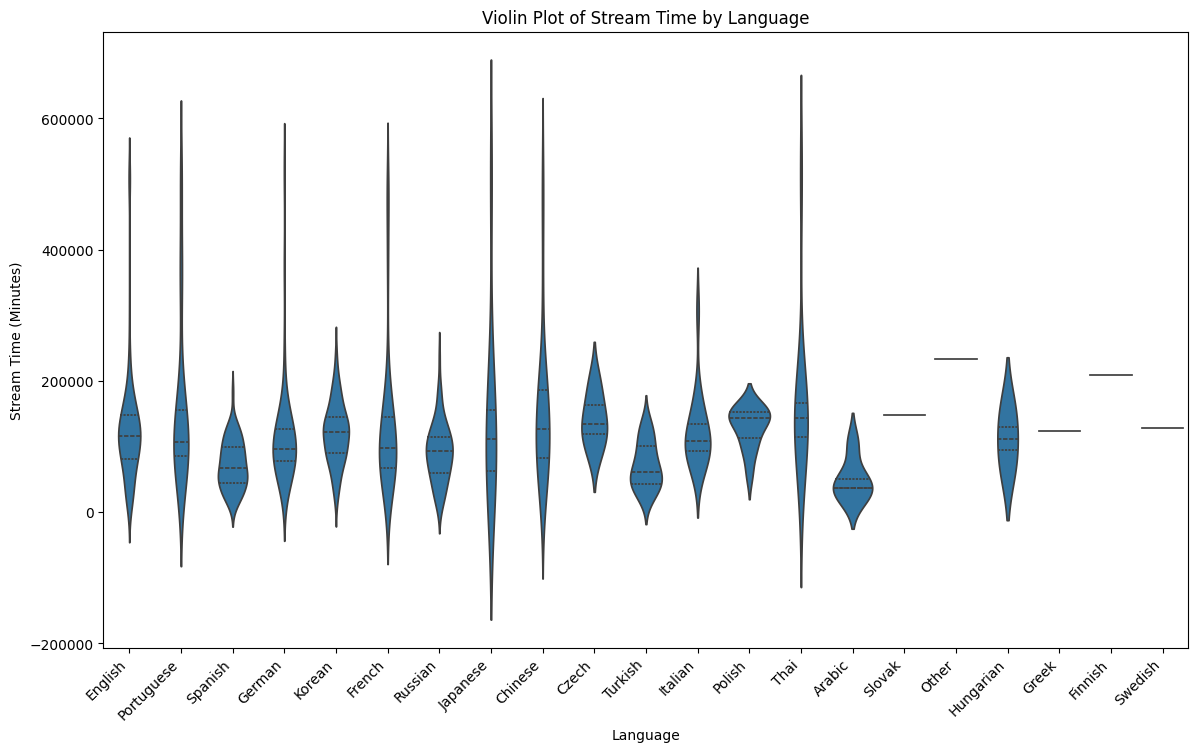

In [93]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Language', y='Stream time(minutes)', data=df, inner="quartile")
plt.title('Violin Plot of Stream Time by Language')
plt.xlabel('Language')
plt.ylabel('Stream Time (Minutes)')
plt.xticks(rotation=45, ha='right')
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\isaia\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

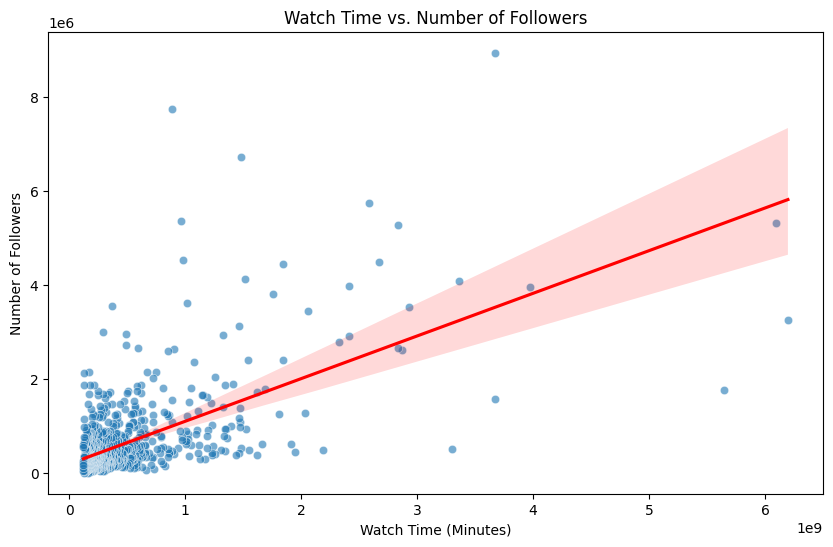

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Watch time(Minutes)', y='Followers', data=df, alpha=0.6)
sns.regplot(x='Watch time(Minutes)', y='Followers', data=df, scatter=False, color='red')
plt.title('Watch Time vs. Number of Followers')
plt.xlabel('Watch Time (Minutes)')
plt.ylabel('Number of Followers')
plt